In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

df = pd.read_csv("/Users/giovanni-lunetta/stat_4185/final_project/2022-2023_season/data/cleaned.csv")
df = df.drop("Unnamed: 0", axis=1)

In [18]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# # Select the variables to scale
# X = df[['ORtg', 'DRtg', 'PER', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
#        'USG%', 'Age', 'MP', 'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA',
#        'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%',
#        '2P%', '3P%', 'FT%', 'TS%', 'eFG%', 'Pos']]

# # Select the variables to scale
# X = df[['ORtg', 'DRtg', 'PER', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
#        'USG%', 'Age', 'MP', '2P%', '3P%', 'FT%', 'TS%', 'eFG%', 'Pos']]

X = df[['FG', 'FGA', '2P', '2PA', '3P', '3PA',
       'ORB', 'DRB', 'AST', 'STL', 'BLK', 'PTS', 'TS%']]

# Create a StandardScaler object
scaler = StandardScaler()

# Apply the scaler to the selected variables
X_scaled = scaler.fit_transform(X)

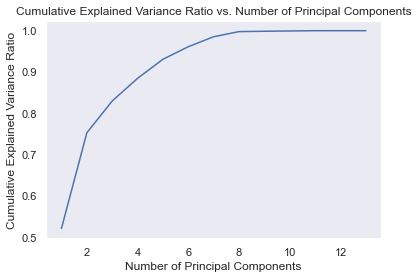

In [19]:
from sklearn.decomposition import PCA

# Perform PCA on the scaled data
pca = PCA().fit(X_scaled)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Visualize the cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid()
plt.show()

In [20]:
n_components = 3  # Choose the optimal number of components based on your analysis

# Create a PCA object with the optimal number of components
pca = PCA(n_components=n_components)

# Fit and transform the scaled data
X_pca = pca.fit_transform(X_scaled)

In [21]:
# Split the PCA-transformed data into training and testing sets
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.3, random_state=42)

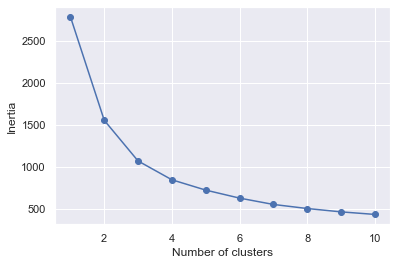

In [22]:
# Find the optimal number of clusters using the elbow method
n_clusters = np.arange(1, 11)
inertia_scores = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_train_pca)
    inertia_scores.append(kmeans.inertia_)

plt.plot(n_clusters, inertia_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [23]:
# Choose the optimal number of clusters based on your analysis
optimal_n_clusters = 5  # Modify this value based on the elbow method

kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(X_train_pca)
cluster_labels_train = kmeans.predict(X_train_pca)
cluster_labels_test = kmeans.predict(X_test_pca)

/var/folders/4b/z0w6x5_n59g_x_9s3qnbx_p80000gn/T/ipykernel_27801/218301477.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Cluster Label')


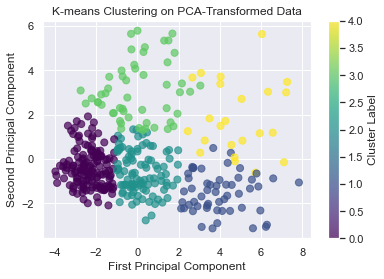

In [24]:
X_all_pca = np.vstack((X_train_pca, X_test_pca))
cluster_labels_all = np.concatenate((cluster_labels_train, cluster_labels_test))

plt.scatter(X_all_pca[:, 0], X_all_pca[:, 1], c=cluster_labels_all, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-means Clustering on PCA-Transformed Data')
plt.colorbar(label='Cluster Label')
plt.show()

In [25]:
# Silhouette Score
silhouette = silhouette_score(X_all_pca, cluster_labels_all)
print("Silhouette Score:", silhouette)

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_all_pca, cluster_labels_all)
print("Calinski-Harabasz Index:", calinski_harabasz)

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_all_pca, cluster_labels_all)
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Score: 0.32788964518582814
Calinski-Harabasz Index: 250.71833646811447
Davies-Bouldin Index: 1.074375037217242


In [26]:
df['cluster'] = cluster_labels_all

In [27]:
# # Use the same feature list as before
# features = ['ORtg', 'DRtg', 'PER', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
#             'USG%', 'Age', 'MP', 'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA',
#             'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%',
#             '2P%', '3P%', 'FT%', 'TS%', 'eFG%', 'Pos']

features = ['FG', 'FGA', '2P', '2PA', '3P', '3PA',
       'ORB', 'DRB', 'AST', 'STL', 'BLK', 'PTS', 'TS%']

# features = ['ORtg', 'DRtg', 'PER', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
#        'USG%', 'Age', 'MP', '2P%', '3P%', 'FT%', 'TS%', 'eFG%', 'Pos']

mean_values = df.groupby('cluster')[features].mean()

In [28]:
from math import pi

def create_radar_chart(mean_values, features, clusters):
    # Set the number of variables and calculate the angle for each axis
    num_vars = len(features)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    # Set the radar chart figure
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    # Set the first axis on top and move clockwise
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw axis lines and labels
    plt.xticks(angles[:-1], features)
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="gray", size=8)
    plt.ylim(0, 1)

    # Normalize the mean values to the range [0, 1]
    normalized_values = mean_values / mean_values.max().max()

    # Plot the radar chart for each cluster
    for i in range(clusters):
        values = normalized_values.iloc[i].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f"Cluster {i}")
        ax.fill(angles, values, alpha=0.25)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title("Mean values by attribute for each cluster")
    plt.show()

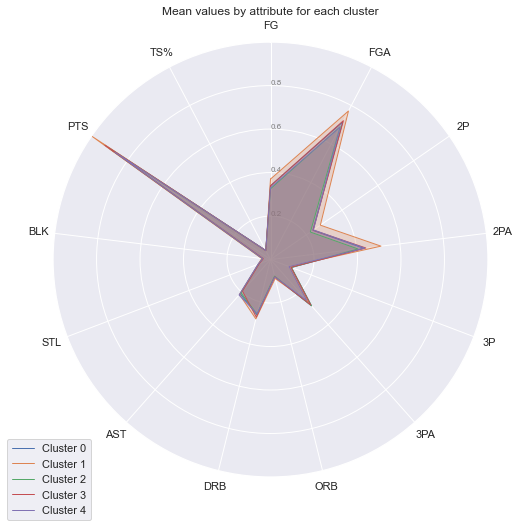

In [29]:
# Call the function to create the radar chart
create_radar_chart(mean_values, features, optimal_n_clusters)

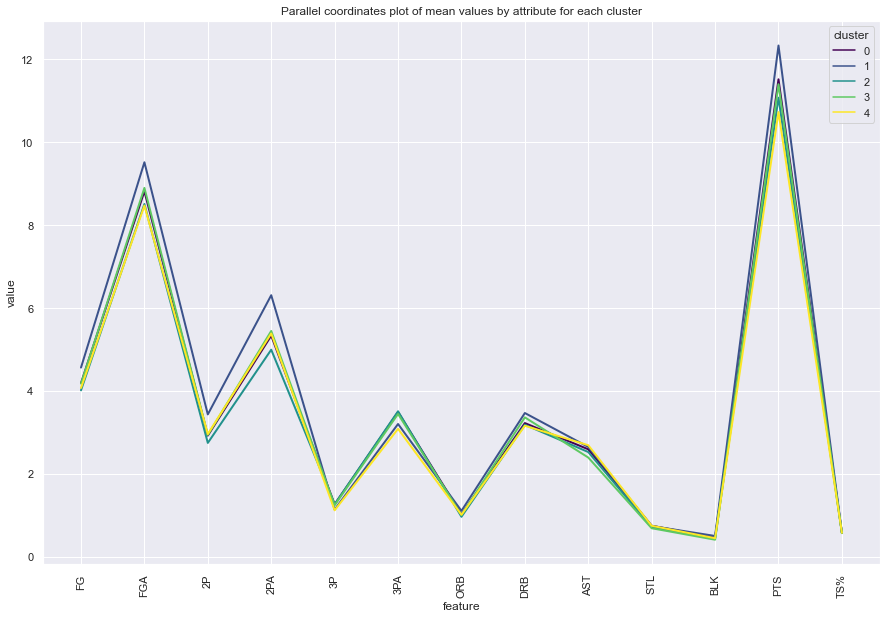

In [30]:
import seaborn as sns

def create_parallel_coordinates_plot(mean_values, features, clusters):
    # Create a new DataFrame with the cluster labels and mean values
    mean_values['cluster'] = mean_values.index
    mean_values = mean_values.reset_index(drop=True)

    # Plot the parallel coordinates plot
    plt.figure(figsize=(15, 10))
    sns.set(style="darkgrid")
    sns.lineplot(data=pd.melt(mean_values, 'cluster', var_name='feature', value_name='value'), x='feature', y='value', hue='cluster', palette='viridis', linewidth=2)
    plt.title("Parallel coordinates plot of mean values by attribute for each cluster")
    plt.xticks(rotation=90)
    plt.show()

# Call the function to create the parallel coordinates plot
create_parallel_coordinates_plot(mean_values, features, optimal_n_clusters)

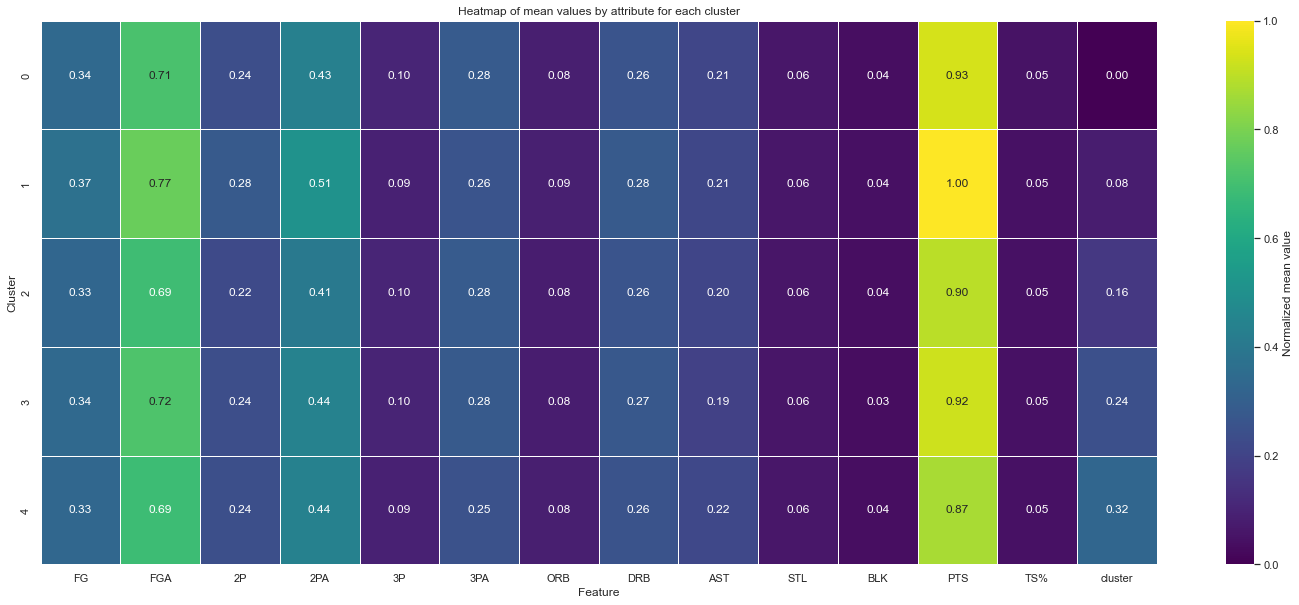

In [31]:
def create_heatmap(mean_values, features, clusters):
    # Normalize the mean values to the range [0, 1]
    normalized_values = mean_values / mean_values.max().max()

    # Plot the heatmap
    plt.figure(figsize=(25, 10))
    sns.heatmap(normalized_values, cmap="viridis", annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Normalized mean value'})
    plt.title("Heatmap of mean values by attribute for each cluster")
    plt.xlabel("Feature")
    plt.ylabel("Cluster")
    plt.show()

# Call the function to create the heatmap
create_heatmap(mean_values, features, optimal_n_clusters)

In [32]:
# Make sure 'Player' column is not in the data used for clustering
assert 'Player' not in X.columns

# Add a new column 'cluster' to the original DataFrame
df['cluster'] = cluster_labels_all

# Print players in each cluster
for i in range(optimal_n_clusters):
    print(f"Players in Cluster {i}:")
    print(df[df['cluster'] == i]['Player'])
    print("\n")

Players in Cluster 0:
2                Thaddeus Young
5                Christian Wood
7               Justise Winslow
8               Zion Williamson
11             Patrick Williams
                 ...           
363                  OG Anunoby
366               Kyle Anderson
367               Jose Alvarado
369               Grayson Allen
370    Nickeil Alexander-Walker
Name: Player, Length: 147, dtype: object


Players in Cluster 1:
6                James Wiseman
16              Grant Williams
28        Duane Washington Jr.
32               Ish Wainright
42                Myles Turner
44              Gary Trent Jr.
57                   Max Strus
63            Dennis Smith Jr.
68               Pascal Siakam
72              Alperen Şengün
75                 Dario Šarić
84            Orlando Robinson
86             Duncan Robinson
110            Kelly Oubre Jr.
115                Isaac Okoro
131             Svi Mykhailiuk
135            Dejounte Murray
137               Monte Morris
147

Ref: https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad